<center>Importing Packages</center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from croston import croston
%matplotlib inline


<center>Read Data and Display 30 random results</center>

In [2]:
df=pd.read_csv("ttc-bus-delay-data-2022.csv")
df['Date']= pd.to_datetime(df['Date'])
df.sample(30)


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
22704,2022-06-02,7,16:24,Thursday,BATHURST AND CARIBOU,Cleaning - Unsanitary,10,20,N,8191
13451,2022-03-29,52,10:14,Tuesday,LAWRENCE AND CULFORD,Emergency Services,20,40,E,3512
34879,2022-08-09,84,18:16,Tuesday,SHEPPARD AND BATHURST,Diversion,50,58,W,3711
10875,2022-03-09,123,18:42,Wednesday,LONG BRANCH LOOP,Security,23,56,NaN,7959
598,2022-01-04,36,06:33,Tuesday,FINCH WEST STATION,Operations - Operator,4,9,W,0
28985,2022-07-11,2,09:00,Monday,FINCH WEST,General Delay,25,0,NaN,0
3157,2022-01-16,53,11:16,Sunday,FINCH STATION,Mechanical,11,22,N,3273
21808,2022-05-26,35,17:42,Thursday,JANE AND EGLINTON,Mechanical,10,20,S,1047
23584,2022-06-08,133,13:22,Wednesday,NEILSON AND SHEPPARD,Operations - Operator,11,22,S,3471
33963,2022-08-04,89,16:39,Thursday,WESTON AND ALBION,Mechanical,9,18,N,9010


<center>Pivot Data such that date is rows, each route is a column, and the cells are the min delay</center>

In [3]:
pivot=pd.pivot_table(df,index="Date",columns= "Route",values="Min Delay",fill_value=0)
pivot

Route,1,10,100,101,102,104,105,106,107,108,...,986,989,9896,99,995,996,999,A242,OTC,RAD
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.000000,0,9.0,0,20.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0,0.0,0.00,0.0,0.0,0,0,0
2022-01-02,0.000000,0,10.0,0,10.0,0.000000,15.000000,16.000000,0.0,17.500000,...,0.0,0.000000,0,0.0,0.00,0.0,0.0,0,0,0
2022-01-03,0.000000,0,9.0,0,15.0,0.000000,0.000000,0.000000,12.0,15.666667,...,0.0,11.500000,0,0.0,11.00,10.5,0.0,0,0,0
2022-01-04,0.000000,0,6.0,0,0.0,0.000000,11.666667,15.000000,0.0,0.000000,...,11.0,13.666667,0,15.0,16.00,9.0,0.0,0,0,0
2022-01-05,0.000000,0,8.0,0,12.2,18.000000,0.000000,25.333333,15.0,17.000000,...,0.0,15.250000,0,0.0,0.00,13.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,2.400000,0,6.0,0,28.0,0.000000,0.000000,10.000000,0.0,20.000000,...,0.0,0.000000,0,15.0,0.00,0.0,0.0,0,0,0
2022-08-28,1.333333,0,10.0,0,0.0,20.000000,15.000000,18.000000,0.0,13.000000,...,0.0,0.000000,0,0.0,0.00,0.0,0.0,0,0,0
2022-08-29,0.000000,0,9.0,0,14.0,18.000000,11.000000,9.000000,10.0,17.000000,...,10.0,14.000000,0,0.0,14.75,10.0,0.0,0,0,0


<center>Here we can select which route we want to run analysis on based on route name</center>

In [4]:
i="120"
ts=pivot.loc[:,i]
valarray=ts.values

<center>Croston is a method that accounts for instance of 0 demand (in this case 0 delay)</center>
<center>Uses smoothing to handle instances of 0</center>
<center>Code was taken from croston documentation website: https://pypi.org/project/croston/</center>

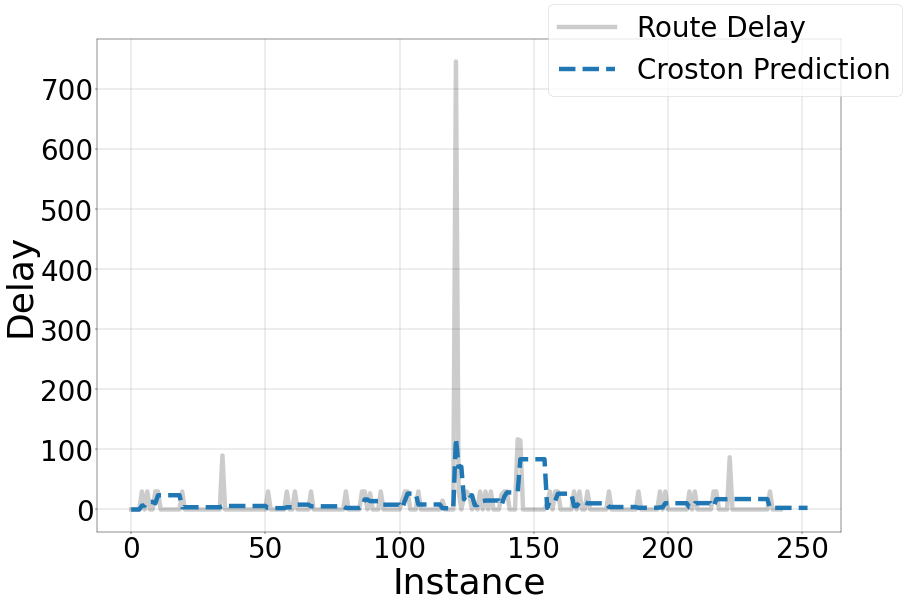

In [5]:
period=10
fit_pred = croston.fit_croston(ts,period,'original')
yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])


plt.figure(figsize=(24,16), dpi= 40)
plt.plot(valarray,"black",alpha=0.2,linewidth=8,label="Route Delay")
plt.plot(yhat,"--",linewidth=8,label="Croston Prediction")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.grid(axis='both')
plt.xlabel('Instance', fontsize = 65)
plt.ylabel('Delay', fontsize = 65)
plt.legend(bbox_to_anchor=(1.1, 1.1),fontsize=50)

<center>Check for Autocorrelation, usually just noise<center>

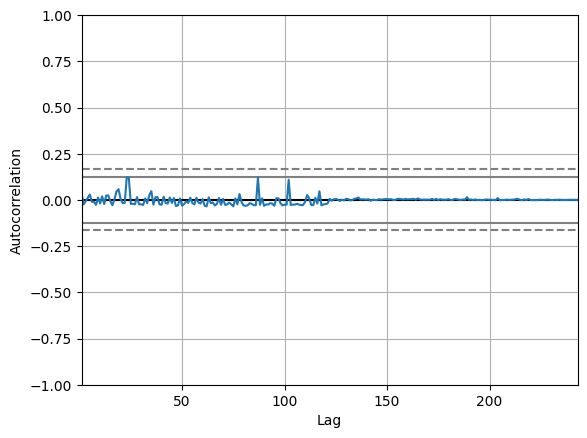

In [6]:
autocorrelation_plot(pivot.loc[:,i])
plt.show()

<center>Create dummies for incidents<center>

In [7]:
df=pd.get_dummies(df, columns=["Incident"],prefix="")
df

,Date,Route,Time,Day,Location,Min Delay,Min Gap,Direction,Vehicle,_Cleaning - Disinfection,...,_General Delay,_Held By,_Investigation,_Late Entering Service,_Mechanical,_Operations - Operator,_Road Blocked - NON-TTC Collision,_Security,_Utilized Off Route,_Vision
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,0,0,NaN,8531,0,...,1,0,0,0,0,0,0,0,0,0
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,131,161,W,8658,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,17,20,S,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,4,11,S,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,4,8,S,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39480,2022-08-31,106,23:06,Wednesday,SHEPPARD WEST STATION,20,40,E,8159,0,...,0,0,0,0,0,0,0,0,1,0
39481,2022-08-31,14,23:07,Wednesday,GLENCAIRN STATION,21,42,NaN,1113,0,...,0,0,0,0,0,0,0,0,0,0
39482,2022-08-31,107,23:25,Wednesday,SHEPPARD WEST STATION,40,80,NaN,8218,0,...,0,0,0,0,0,1,0,0,0,0
39483,2022-08-31,32,23:30,Wednesday,EGLINTON STATION,12,24,E,1360,0,...,0,0,0,0,0,0,0,0,1,0


<center>Run OLS model<center>

In [8]:
y=df["Min Delay"]
x=df.iloc[:,9:]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Min Delay   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     961.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:55:44   Log-Likelihood:            -2.0254e+05
No. Observations:               39485   AIC:                         4.051e+05
Df Residuals:                   39470   BIC:                         4.052e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                34.4480      1.214     28.378      0.000      32.069      36.827
_Cleaning - Disinfection             54.8854     15.661      3.505      0.000      24.189      85.581
_Cleaning - Unsanitary              -19.6893      1.778    -11.071      0.000     -23.175     -16.204
_Collision - TTC                    -22.4532      1.451    -15.475      0.000     -25.297     -19.609
_Diversion                           89.8311      1.522     59.014      0.000      86.848      92.815
_Emergency Services                 -22.5317      1.557    -14.474      0.000     -25.583     -19.481
_General Delay                       -6.2968      1.512     -4.164      0.000      -9.261      -3.333
_Held By                             64.5992      3.908     16.530      0.000      56.939      72.259
_Investigation                      -22.9299      1.998    -11.478      0.000     -26.846     -19.014
_Late Entering Service              -15.1787      7.598     -1.998      0.046     -30.071      -0.286
_Mechanical                         -21.3189      1.268    -16.813      0.000     -23.804     -18.834
_Operations - Operator              -20.8936      1.255    -16.654      0.000     -23.353     -18.435
_Road Blocked - NON-TTC Collision    40.2297      2.277     17.665      0.000      35.766      44.693
_Security                           -20.9482      1.466    -14.289      0.000     -23.822     -18.075
_Utilized Off Route                 -22.0694      1.476    -14.948      0.000     -24.963     -19.176
_Vision                             -20.7876      2.219     -9.368      0.000     -25.137     -16.439
==============================================================================
Omnibus:                    64710.081   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55700373.581
Skew:                          10.955   Prob(JB):                         0.00
Kurtosis:                     185.691   Cond. No.                     1.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<center>Function that will calculate average estimated wait time due to incident type<center>

In [9]:
def predict_delay(incident:str):
    if incident=="Disinfection":
        x_1=1
    else:
        x_1=0
    if incident=="Unsanitary":
        x_2=1
    else:
        x_2=0
    if incident=="Collision":
        x_3=1
    else:
        x_3=0
    if incident=="Diversion":
        x_4=1
    else:
        x_4=0
    if incident=="Emergency":
        x_5=1
    else:
        x_5=0
    if incident=="General":
        x_6=1
    else:
        x_6=0
    if incident=="Held By":
        x_7=1
    else:
        x_7=0
    if incident=="Investigation":
        x_8=1
    else:
        x_8=0
    if incident=="Late Entering Service":
        x_9=1
    else:
        x_9=0
    if incident=="Mechanical":
        x_10=1
    else:
        x_10=0
    if incident=="Operator":
        x_11=1
    else:
        x_11=0
    if incident=="Road Block":
        x_12=1
    else:
        x_12=0
    if incident=="Security":
        x_13=1
    else:
        x_13=0
    if incident=="Off Route":
        x_14=1
    else:
        x_14=0
    if incident=="Vision":
        x_15=1
    else:
        x_15=0
    delay=34.4480+x_1*54.8854+x_2*-19.6893+x_3*-22.4532+x_4*89.8311+x_5*-22.5317+x_6*-6.2968+x_7*64.5992+x_8*-22.9299+x_9*-15.1787+x_10*-21.3189+x_11*-20.8936+x_12*40.2297+x_13*-20.9482+x_14*-22.0694+x_15*-20.7876
    delay=round(delay,2)
    return ("there is a delay of {} mins").format(delay)

<center>Function Call<center>

In [10]:
predict_delay("Vision")

'there is a delay of 13.66 mins'